In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
sales_order_sheet = pd.read_excel('US_Regional_Sales_Data.xlsx', sheet_name='Sales Orders Sheet')
customers_sheet = pd.read_excel('US_Regional_Sales_Data.xlsx', sheet_name='Customers Sheet')
store_location_sheet = pd.read_excel('US_Regional_Sales_Data.xlsx', sheet_name='Store Locations Sheet')
products_sheet = pd.read_excel('US_Regional_Sales_Data.xlsx', sheet_name='Products Sheet')
regions_sheet = pd.read_excel('US_Regional_Sales_Data.xlsx', sheet_name='Regions Sheet')
sales_team_sheet = pd.read_excel('US_Regional_Sales_Data.xlsx', sheet_name='Sales Team Sheet')

In [4]:
sales_order_sheet.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144


In [5]:
sales_team_sheet.head()

,_SalesTeamID,Sales Team,Region
0,1,Adam Hernandez,Northeast
1,2,Keith Griffin,Northeast
2,3,Jerry Green,West
3,4,Chris Armstrong,Northeast
4,5,Stephen Payne,South


In [6]:
customers_sheet.head()

,_CustomerID,Customer Names
0,1,Avon Corp
1,2,WakeFern
2,3,"Elorac, Corp"
3,4,ETUDE Ltd
4,5,Procter Corp


In [7]:
store_location_sheet.head()

,_StoreID,City Name,County,StateCode,State,Type,Latitude,Longitude,AreaCode,Population,Household Income,Median Income,Land Area,Water Area,Time Zone
0,1,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
1,2,Huntsville,Limestone County/Madison County,AL,Alabama,City,34.69901,-86.67298,256,190582,78554,48775,552604579,3452021,America/Chicago
2,3,Mobile,Mobile County,AL,Alabama,City,30.69436,-88.04305,251,194288,76170,38776,361044263,105325210,America/Chicago
3,4,Montgomery,Montgomery County,AL,Alabama,City,32.36681,-86.29997,334,200602,79866,42927,413985435,4411954,America/Chicago
4,5,Little Rock,Pulaski County,AR,Arkansas,City,34.74648,-92.28959,501,197992,79902,46085,307398785,6758644,America/Chicago


In [8]:
products_sheet.head()

,_ProductID,Product Name
0,1,Cookware
1,2,Photo Frames
2,3,Table Lamps
3,4,Serveware
4,5,Bathroom Furniture


In [9]:
regions_sheet.head()

,StateCode,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [10]:
sales_team_sheet.head()

,_SalesTeamID,Sales Team,Region
0,1,Adam Hernandez,Northeast
1,2,Keith Griffin,Northeast
2,3,Jerry Green,West
3,4,Chris Armstrong,Northeast
4,5,Stephen Payne,South


# *Merging and preparing data for analysis*

In [11]:
dataframes = [sales_order_sheet, customers_sheet, store_location_sheet, products_sheet, regions_sheet,
              sales_team_sheet]

for name in dataframes:
    name.columns = name.columns.str.lower()
    name.columns = name.columns.str.replace('_', '')

### Merging Sales Order Sheet and Customer sheet

In [12]:
df1 = pd.merge(sales_order_sheet, customers_sheet, on='customerid')
df1.drop(columns={'customerid'}, inplace=True)

In [13]:
df1.head()

,ordernumber,sales channel,warehousecode,procureddate,orderdate,shipdate,deliverydate,currencycode,salesteamid,storeid,productid,order quantity,discount applied,unit price,unit cost,customer names
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,259,12,5,0.075,1963.1,1001.181,Rochester Ltd
1,SO - 000125,In-Store,WARE-NMK1003,2018-04-10,2018-06-02,2018-06-16,2018-06-24,USD,4,173,13,1,0.150,268.0,131.320,Rochester Ltd
2,SO - 000212,In-Store,WARE-NMK1003,2017-12-31,2018-06-13,2018-07-05,2018-07-13,USD,7,144,8,3,0.100,2217.7,1707.629,Rochester Ltd
3,SO - 000268,In-Store,WARE-NMK1003,2018-04-10,2018-06-19,2018-07-14,2018-07-17,USD,3,178,2,5,0.075,1293.1,659.481,Rochester Ltd
4,SO - 000334,In-Store,WARE-MKL1006,2018-04-10,2018-06-28,2018-07-10,2018-07-17,USD,10,352,18,2,0.150,2586.2,1629.306,Rochester Ltd


### Merging df1 (sales order sheet + customer sheet) and store location sheet

In [14]:
df2 = pd.merge(df1, store_location_sheet, on='storeid')
df2.drop(columns={'storeid'}, inplace=True)

In [15]:
df2.head()

,ordernumber,sales channel,warehousecode,procureddate,orderdate,shipdate,deliverydate,currencycode,salesteamid,productid,order quantity,discount applied,unit price,unit cost,customer names,city name,county,statecode,state,type,latitude,longitude,areacode,population,household income,median income,land area,water area,time zone
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,12,5,0.075,1963.1,1001.181,Rochester Ltd,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York
1,SO - 0003926,Online,WARE-UHY1004,2019-05-15,2019-08-24,2019-09-13,2019-09-21,USD,15,9,5,0.050,3993.2,1836.872,Pacific Ltd,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York
2,SO - 0006713,In-Store,WARE-UHY1004,2020-03-10,2020-07-21,2020-08-15,2020-08-16,USD,6,6,3,0.075,2492.4,1246.200,"Fenwal, Corp",Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York
3,SO - 0003168,In-Store,WARE-UHY1004,2019-02-04,2019-05-25,2019-06-12,2019-06-14,USD,4,35,3,0.150,6123.8,2816.948,Ohio,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York
4,SO - 000236,Distributor,WARE-UHY1004,2018-04-10,2018-06-15,2018-07-13,2018-07-20,USD,21,26,1,0.150,3999.9,2359.941,Apollo Ltd,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York


### Merging df2 (sales order sheet + customer sheet + store location sheet) and sales team sheet

In [16]:
df3 = pd.merge(df2, sales_team_sheet, on='salesteamid')
df3.drop(columns={'salesteamid'}, inplace=True)

In [17]:
df3.head()

,ordernumber,sales channel,warehousecode,procureddate,orderdate,shipdate,deliverydate,currencycode,productid,order quantity,discount applied,unit price,unit cost,customer names,city name,county,statecode,state,type,latitude,longitude,areacode,population,household income,median income,land area,water area,time zone,sales team,region
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,12,5,0.075,1963.1,1001.181,Rochester Ltd,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Joshua Bennett,Northeast
1,SO - 0006713,In-Store,WARE-UHY1004,2020-03-10,2020-07-21,2020-08-15,2020-08-16,USD,6,3,0.075,2492.4,1246.200,"Fenwal, Corp",Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Joshua Bennett,Northeast
2,SO - 0005035,In-Store,WARE-UHY1004,2019-08-23,2020-01-08,2020-01-15,2020-01-21,USD,1,3,0.150,1755.4,1298.996,Niconovum Corp,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Joshua Bennett,Northeast
3,SO - 0006409,In-Store,WARE-UHY1004,2020-03-10,2020-06-17,2020-07-03,2020-07-12,USD,16,5,0.075,3544.3,2020.251,Weimei Corp,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Joshua Bennett,Northeast
4,SO - 0001765,In-Store,WARE-NMK1003,2018-07-19,2018-12-15,2018-12-27,2018-12-29,USD,19,5,0.050,1139.0,899.810,"Elorac, Corp",Rockford,Winnebago County/Ogle County,IL,Illinois,City,42.25884,-89.06455,815,148278,58559,38716,164382960,2627885,America/Chicago,Joshua Bennett,Northeast


### Merging df3 (sales order sheet + customer sheet + store location sheet + sales team sheet) and products sheet

In [18]:
df4 = pd.merge(df3, products_sheet, on='productid')
df4.drop(columns={'productid'}, inplace=True)

In [19]:
df4.head()

,ordernumber,sales channel,warehousecode,procureddate,orderdate,shipdate,deliverydate,currencycode,order quantity,discount applied,unit price,unit cost,customer names,city name,county,statecode,state,type,latitude,longitude,areacode,population,household income,median income,land area,water area,time zone,sales team,region,product name
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,5,0.075,1963.1,1001.181,Rochester Ltd,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Joshua Bennett,Northeast,Dining Furniture
1,SO - 0002491,In-Store,WARE-NMK1003,2018-10-27,2019-03-06,2019-03-25,2019-03-30,USD,7,0.150,1051.9,610.102,Apollo Ltd,Macon,Bibb County,GA,Georgia,Other,32.80884,-83.69419,478,153515,57025,36568,645603627,14488557,America/New York,Joshua Bennett,Northeast,Dining Furniture
2,SO - 0001458,In-Store,WARE-NMK1003,2018-07-19,2018-11-09,2018-11-11,2018-11-17,USD,8,0.300,1011.7,435.031,Medline,Colorado Springs,El Paso County,CO,Colorado,City,38.83388,-104.82136,719,456568,174441,54527,506667557,947196,America/Denver,Joshua Bennett,Northeast,Dining Furniture
3,SO - 0005166,In-Store,WARE-PUJ1005,2019-08-23,2020-01-22,2020-01-28,2020-01-31,USD,5,0.050,1909.5,954.750,New Ltd,Buffalo,Erie County,NY,New York,City,42.88645,-78.87837,716,258071,110549,31918,104592941,31362925,America/New York,Joshua Bennett,Northeast,Dining Furniture
4,SO - 0002439,In-Store,WARE-UHY1004,2018-10-27,2019-02-26,2019-03-06,2019-03-10,USD,3,0.200,1775.5,1047.545,Trigen,Paradise,Clark County,NV,Nevada,CDP,36.09719,-115.14666,702,223182,88401,43911,121034884,0,America/Los Angeles,Joshua Bennett,Northeast,Dining Furniture


In [20]:
df = df4.copy()

In [21]:
df.head()

,ordernumber,sales channel,warehousecode,procureddate,orderdate,shipdate,deliverydate,currencycode,order quantity,discount applied,unit price,unit cost,customer names,city name,county,statecode,state,type,latitude,longitude,areacode,population,household income,median income,land area,water area,time zone,sales team,region,product name
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,5,0.075,1963.1,1001.181,Rochester Ltd,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Joshua Bennett,Northeast,Dining Furniture
1,SO - 0002491,In-Store,WARE-NMK1003,2018-10-27,2019-03-06,2019-03-25,2019-03-30,USD,7,0.150,1051.9,610.102,Apollo Ltd,Macon,Bibb County,GA,Georgia,Other,32.80884,-83.69419,478,153515,57025,36568,645603627,14488557,America/New York,Joshua Bennett,Northeast,Dining Furniture
2,SO - 0001458,In-Store,WARE-NMK1003,2018-07-19,2018-11-09,2018-11-11,2018-11-17,USD,8,0.300,1011.7,435.031,Medline,Colorado Springs,El Paso County,CO,Colorado,City,38.83388,-104.82136,719,456568,174441,54527,506667557,947196,America/Denver,Joshua Bennett,Northeast,Dining Furniture
3,SO - 0005166,In-Store,WARE-PUJ1005,2019-08-23,2020-01-22,2020-01-28,2020-01-31,USD,5,0.050,1909.5,954.750,New Ltd,Buffalo,Erie County,NY,New York,City,42.88645,-78.87837,716,258071,110549,31918,104592941,31362925,America/New York,Joshua Bennett,Northeast,Dining Furniture
4,SO - 0002439,In-Store,WARE-UHY1004,2018-10-27,2019-02-26,2019-03-06,2019-03-10,USD,3,0.200,1775.5,1047.545,Trigen,Paradise,Clark County,NV,Nevada,CDP,36.09719,-115.14666,702,223182,88401,43911,121034884,0,America/Los Angeles,Joshua Bennett,Northeast,Dining Furniture


# Analysis

## *Distribution of Sales for Sales Team representatives.*

In [22]:
pd.unique(df['sales team'])

array(['Joshua Bennett', 'Roger Alexander', 'Chris Armstrong',
       'Samuel Fowler', 'Carl Nguyen', 'Jonathan Hawkins',
       'Joshua Little', 'Keith Griffin', 'Roy Rice', 'Donald Reynolds',
       'Shawn Wallace', 'Nicholas Cunningham', 'Jerry Green',
       'Anthony Torres', 'Frank Brown', 'Todd Roberts', 'Adam Hernandez',
       'George Lewis', 'Douglas Tucker', 'Shawn Cook', 'Paul Holmes',
       'Carlos Miller', 'Anthony Berry', 'Shawn Torres', 'Patrick Graham',
       'Joshua Ryan', 'Stephen Payne', 'Joe Price'], dtype=object)

### There are 28 Sales Team representative in the dataset. Now I have to determine the total number of sales for each team leader.

In [242]:
df['sales team'].value_counts().head(3)

Todd Roberts     340
Shawn Wallace    316
George Lewis     315
Name: sales team, dtype: int64

In [243]:
df['sales team'].value_counts().tail(3)

Patrick Graham    259
Carlos Miller     247
Keith Griffin     246
Name: sales team, dtype: int64

<AxesSubplot:title={'center':'Sales Representative vs Total Sales'}>

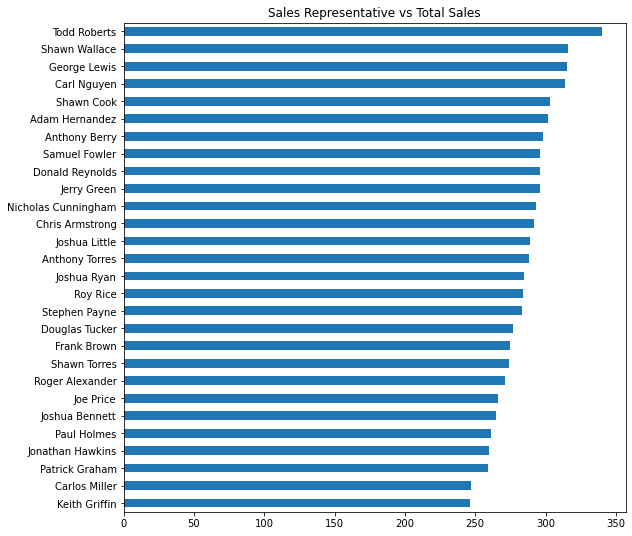

In [24]:
plt.title("Sales Representative vs Total Sales")
df['sales team'].value_counts().sort_values(ascending=True).plot.barh(figsize=(9,9))

### Todd Roberts, with 340 total sales, Shawn Wallace, with 316 total sales, and George Lewis, with 315 total sales, have been the top sales representatives for the past three years, according to the data.
### Patrick Graham, with 259 total sales, Carlos Miller, with 247 total sales, and Keith Griffin, with 246 total sales, are the representatives with the lowest total sales.

## *Distribution of Orders and Sales for the top states*

In [25]:
df.head(2)

,ordernumber,sales channel,warehousecode,procureddate,orderdate,shipdate,deliverydate,currencycode,order quantity,discount applied,unit price,unit cost,customer names,city name,county,statecode,state,type,latitude,longitude,areacode,population,household income,median income,land area,water area,time zone,sales team,region,product name
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,5,0.075,1963.1,1001.181,Rochester Ltd,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Joshua Bennett,Northeast,Dining Furniture
1,SO - 0002491,In-Store,WARE-NMK1003,2018-10-27,2019-03-06,2019-03-25,2019-03-30,USD,7,0.150,1051.9,610.102,Apollo Ltd,Macon,Bibb County,GA,Georgia,Other,32.80884,-83.69419,478,153515,57025,36568,645603627,14488557,America/New York,Joshua Bennett,Northeast,Dining Furniture


In [26]:
state_df = df[['sales channel', 'order quantity', 'unit price', 'unit cost', 'state', 'statecode', 'city name', 'areacode', 'land area', 'product name']]

In [27]:
state_df.head()

,sales channel,order quantity,unit price,unit cost,state,statecode,city name,areacode,land area,product name
0,In-Store,5,1963.1,1001.181,New York,NY,Babylon (Town),631,135481314,Dining Furniture
1,In-Store,7,1051.9,610.102,Georgia,GA,Macon,478,645603627,Dining Furniture
2,In-Store,8,1011.7,435.031,Colorado,CO,Colorado Springs,719,506667557,Dining Furniture
3,In-Store,5,1909.5,954.750,New York,NY,Buffalo,716,104592941,Dining Furniture
4,In-Store,3,1775.5,1047.545,Nevada,NV,Paradise,702,121034884,Dining Furniture


In [ ]:
state_df['total orders'] = state_df['state'].apply(lambda x: sum(state_df[state_df['state'] == x]['order quantity']))

In [104]:
state_df.head()

,sales channel,order quantity,unit price,unit cost,state,statecode,city name,areacode,land area,product name,total orders
0,In-Store,5,1963.1,1001.181,New York,NY,Babylon (Town),631,135481314,Dining Furniture,1763
1,In-Store,7,1051.9,610.102,Georgia,GA,Macon,478,645603627,Dining Furniture,636
2,In-Store,8,1011.7,435.031,Colorado,CO,Colorado Springs,719,506667557,Dining Furniture,1395
3,In-Store,5,1909.5,954.750,New York,NY,Buffalo,716,104592941,Dining Furniture,1763
4,In-Store,3,1775.5,1047.545,Nevada,NV,Paradise,702,121034884,Dining Furniture,672


In [105]:
orders_df = state_df.drop_duplicates(subset ="state",keep = 'first')
orders_df = orders_df[['state', 'total orders']]
orders_df.reset_index(drop=True, inplace=True)
orders_df.sort_values(by=['total orders'],ascending=True, inplace=True)
orders_df = orders_df.tail(10)

In [106]:
orders_df.head()

,state,total orders
16,Virginia,850
9,Arizona,865
5,North Carolina,953
8,Indiana,1334
2,Colorado,1395


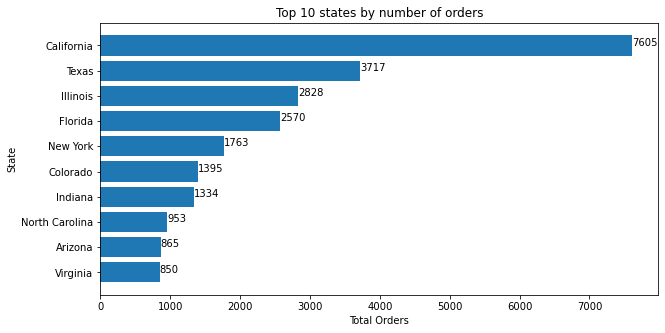

In [107]:
total_orders = list(orders_df['total orders'])
plt.figure(figsize=(10,5))
plt.title("Top 10 states by number of orders")
plt.xlabel("Total Orders")
plt.ylabel("State")
plt.barh(orders_df['state'], orders_df['total orders'])

for index, value in enumerate(total_orders):
    plt.text(value, index, str(value))
plt.show()

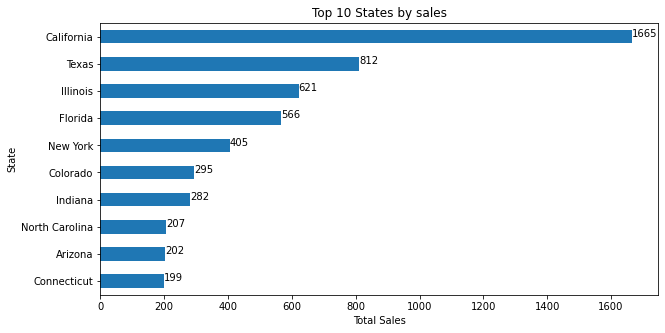

In [108]:
plt.figure(figsize=(10,5))
plt.title("Top 10 States by sales")
plt.xlabel("Total Sales")
plt.ylabel("State")
state_df['state'].value_counts().head(10).sort_values(ascending=True).plot.barh()
for index, value in enumerate(state_df['state'].value_counts().head(10).sort_values(ascending=True)):
    plt.text(value, index, str(value))

### According to the data, California had far more sales than the other states over the three-year period. Texas, Illinois, Florida, and New York, in that order, came in second, third, fourth, and fifth.

## Products distribution by state

In [36]:
state_df.head()

,sales channel,order quantity,unit price,unit cost,state,statecode,city name,areacode,land area,product name,total orders
0,In-Store,5,1963.1,1001.181,New York,NY,Babylon (Town),631,135481314,Dining Furniture,1763
1,In-Store,7,1051.9,610.102,Georgia,GA,Macon,478,645603627,Dining Furniture,636
2,In-Store,8,1011.7,435.031,Colorado,CO,Colorado Springs,719,506667557,Dining Furniture,1395
3,In-Store,5,1909.5,954.750,New York,NY,Buffalo,716,104592941,Dining Furniture,1763
4,In-Store,3,1775.5,1047.545,Nevada,NV,Paradise,702,121034884,Dining Furniture,672


In [37]:
distribute_df = pd.DataFrame()
states = list(pd.unique(state_df['state']))
products = list(pd.unique(state_df['product name']))
distribute_df['State'] = states

for a in products:
    distribute_df[str(a)] = 0
    
distribute_df['Total'] = 0

In [244]:
distribute_df.head(2)

,State,Dining Furniture,Computers,Cookware,Stemware,Vanities,Candleholders,Festive,Table Linens,Candles,Accessories,Floor Lamps,Wall Frames,Dinnerware,Serveware,Ornaments,Furniture Cushions,Outdoor Furniture,TV and video,Rugs,Bakeware,Cocktail Glasses,Wall Coverings,Platters,Clocks,Bathroom Furniture,Outdoor Decor,Phones,Bean Bags,Mirrors,Table Lamps,Audio,Collectibles,Bar Tools,Photo Frames,Sculptures,Bedroom Furniture,Wreaths,Vases,Pillows,Floral,Wine Storage,Blankets,Basketball,Pendants,Wardrobes,Baseball,Home Fragrances,Total
0,New York,9,6,5,12,10,4,15,9,4,12,7,4,9,11,7,7,5,9,12,14,4,7,9,7,8,5,6,6,5,14,7,8,16,10,11,8,13,7,8,11,11,10,5,4,11,10,13,405
1,Georgia,4,4,4,1,3,5,4,4,1,3,3,3,3,3,3,1,4,1,4,2,8,5,5,3,1,6,5,3,4,5,1,5,3,1,0,8,5,3,3,3,4,3,5,2,1,3,6,161


In [39]:
# distribution_product_by_state
for state in state_df.groupby(['state', 'product name']):
    state_name = state[0][0]
    column_name = state[0][1]
    no_of_sale = len(state[1])
    
    distribute_df.loc[distribute_df['State'] == state_name, column_name] = no_of_sale

In [41]:
all_columns = list(distribute_df.columns[1:-1])
all_columns

for state_name in list(pd.unique(distribute_df['State'])):
    distribute_df.loc[distribute_df['State'] == state_name, 'Total'] = distribute_df.loc[distribute_df['State'] == state_name, all_columns].sum(axis=1)

In [100]:
new_distribute = distribute_df.sort_values('Total', ascending=False)
new_distribute.reset_index(drop=True, inplace=True)
new_distribute.set_index("State", inplace=True)

In [101]:
new_distribute.head()

,Dining Furniture,Computers,Cookware,Stemware,Vanities,Candleholders,Festive,Table Linens,Candles,Accessories,Floor Lamps,Wall Frames,Dinnerware,Serveware,Ornaments,Furniture Cushions,Outdoor Furniture,TV and video,Rugs,Bakeware,Cocktail Glasses,Wall Coverings,Platters,Clocks,Bathroom Furniture,Outdoor Decor,Phones,Bean Bags,Mirrors,Table Lamps,Audio,Collectibles,Bar Tools,Photo Frames,Sculptures,Bedroom Furniture,Wreaths,Vases,Pillows,Floral,Wine Storage,Blankets,Basketball,Pendants,Wardrobes,Baseball,Home Fragrances,Total
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
California,36,32,34,38,32,38,38,39,38,41,33,26,33,52,38,37,28,28,35,36,48,28,45,35,32,31,40,40,31,25,36,39,29,46,41,32,35,35,19,36,31,35,41,31,40,34,38,1665
Texas,25,20,10,19,14,10,8,17,19,20,18,17,16,20,20,24,19,18,28,17,24,17,21,18,20,13,20,13,15,18,9,14,13,13,22,14,25,7,16,20,16,21,21,19,20,10,14,812
Illinois,16,16,14,14,6,9,12,15,11,17,15,13,12,22,14,15,10,20,16,12,18,16,19,11,14,11,14,13,12,9,10,11,12,18,10,13,9,17,7,10,19,8,11,16,13,7,14,621
Florida,11,17,15,14,15,15,8,14,11,18,10,13,13,19,11,8,10,12,12,9,11,6,11,15,10,6,8,8,13,22,16,11,19,7,15,9,17,10,3,10,15,8,7,18,10,14,12,566
New York,9,6,5,12,10,4,15,9,4,12,7,4,9,11,7,7,5,9,12,14,4,7,9,7,8,5,6,6,5,14,7,8,16,10,11,8,13,7,8,11,11,10,5,4,11,10,13,405


### A dataframe with states as the index and products as the columns, with total units sold over a three-year period as the input.

# *Sales by Warehouse*

In [141]:
pd.unique(df['warehousecode'])

array(['WARE-UHY1004', 'WARE-NMK1003', 'WARE-PUJ1005', 'WARE-NBV1002',
       'WARE-XYS1001', 'WARE-MKL1006'], dtype=object)

In [142]:
warehouses = list(pd.unique(df['warehousecode']))
warehouse_df = pd.DataFrame()
warehouse_df['Warehouse name'] = warehouses
warehouse_df['Total sales'] = 0

for warehouse in df.groupby('warehousecode'):
    warehouse_df.loc[warehouse_df['Warehouse name'] == warehouse[0], 'Total sales'] = len(warehouse[1])

In [143]:
warehouse_df

,Warehouse name,Total sales
0,WARE-UHY1004,1265
1,WARE-NMK1003,2505
2,WARE-PUJ1005,1451
3,WARE-NBV1002,691
4,WARE-XYS1001,1222
5,WARE-MKL1006,857


<AxesSubplot:ylabel='warehousecode'>

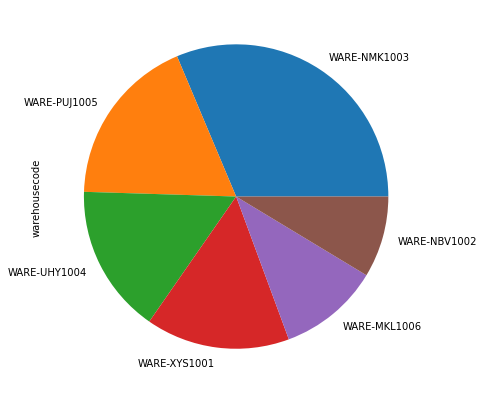

In [245]:
df['warehousecode'].value_counts().plot.pie(figsize=(7,7))

### Over a three-year period, the above pie chart depicts the distribution of sales by warehouse. With 1265 sales, WARE-UHY1004 was the most popular.

## *Sales patterns at various times of the year (according to order dates).*

In [247]:
df.head(3)

,ordernumber,sales channel,warehousecode,procureddate,orderdate,shipdate,deliverydate,currencycode,order quantity,discount applied,unit price,unit cost,customer names,city name,county,statecode,state,type,latitude,longitude,areacode,population,household income,median income,land area,water area,time zone,sales team,region,product name
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,5,0.075,1963.1,1001.181,Rochester Ltd,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Joshua Bennett,Northeast,Dining Furniture
1,SO - 0002491,In-Store,WARE-NMK1003,2018-10-27,2019-03-06,2019-03-25,2019-03-30,USD,7,0.150,1051.9,610.102,Apollo Ltd,Macon,Bibb County,GA,Georgia,Other,32.80884,-83.69419,478,153515,57025,36568,645603627,14488557,America/New York,Joshua Bennett,Northeast,Dining Furniture
2,SO - 0001458,In-Store,WARE-NMK1003,2018-07-19,2018-11-09,2018-11-11,2018-11-17,USD,8,0.300,1011.7,435.031,Medline,Colorado Springs,El Paso County,CO,Colorado,City,38.83388,-104.82136,719,456568,174441,54527,506667557,947196,America/Denver,Joshua Bennett,Northeast,Dining Furniture


In [112]:
type(df['orderdate'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [113]:
trends_df = df.copy()

In [116]:
trends_df.drop(columns={'procureddate'},inplace=True)

In [163]:
trends_df['orderdate'] = trends_df['orderdate'].apply(lambda x: x.date())
trends_df['shipdate'] = trends_df['shipdate'].apply(lambda x: x.date())
trends_df['deliverydate'] = trends_df['deliverydate'].apply(lambda x: x.date())

In [165]:
trends_df.head()

,ordernumber,sales channel,warehousecode,orderdate,shipdate,deliverydate,currencycode,order quantity,discount applied,unit price,unit cost,customer names,city name,county,statecode,state,type,latitude,longitude,areacode,population,household income,median income,land area,water area,time zone,sales team,region,product name
0,SO - 000101,In-Store,WARE-UHY1004,2018-05-31,2018-06-14,2018-06-19,USD,5,0.075,1963.1,1001.181,Rochester Ltd,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Joshua Bennett,Northeast,Dining Furniture
1,SO - 0002491,In-Store,WARE-NMK1003,2019-03-06,2019-03-25,2019-03-30,USD,7,0.150,1051.9,610.102,Apollo Ltd,Macon,Bibb County,GA,Georgia,Other,32.80884,-83.69419,478,153515,57025,36568,645603627,14488557,America/New York,Joshua Bennett,Northeast,Dining Furniture
2,SO - 0001458,In-Store,WARE-NMK1003,2018-11-09,2018-11-11,2018-11-17,USD,8,0.300,1011.7,435.031,Medline,Colorado Springs,El Paso County,CO,Colorado,City,38.83388,-104.82136,719,456568,174441,54527,506667557,947196,America/Denver,Joshua Bennett,Northeast,Dining Furniture
3,SO - 0005166,In-Store,WARE-PUJ1005,2020-01-22,2020-01-28,2020-01-31,USD,5,0.050,1909.5,954.750,New Ltd,Buffalo,Erie County,NY,New York,City,42.88645,-78.87837,716,258071,110549,31918,104592941,31362925,America/New York,Joshua Bennett,Northeast,Dining Furniture
4,SO - 0002439,In-Store,WARE-UHY1004,2019-02-26,2019-03-06,2019-03-10,USD,3,0.200,1775.5,1047.545,Trigen,Paradise,Clark County,NV,Nevada,CDP,36.09719,-115.14666,702,223182,88401,43911,121034884,0,America/Los Angeles,Joshua Bennett,Northeast,Dining Furniture


In [167]:
pd.unique(pd.DatetimeIndex(trends_df['orderdate']).year)

array([2018, 2019, 2020], dtype=int64)

In [170]:
trends_df["order year"] = pd.DatetimeIndex(trends_df['orderdate']).year

<AxesSubplot:title={'center':'Total sales for each year'}, xlabel='Year', ylabel='Sales'>

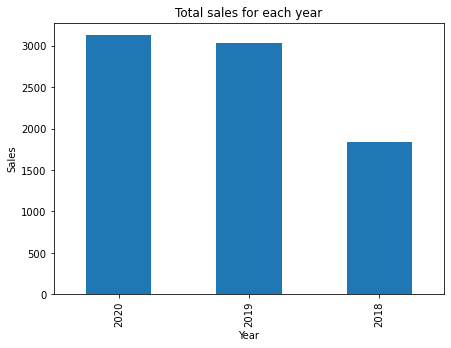

In [187]:
plt.title("Total sales for each year")
plt.xlabel('Year')
plt.ylabel('Sales')
trends_df['order year'].value_counts().plot.bar(figsize=(7,5))

### Orders have gradually climbed over the last three years, according to the bar chart.

In [188]:
trends_df["order month"] = pd.DatetimeIndex(trends_df['orderdate']).month

In [190]:
trends_df.head()

,ordernumber,sales channel,warehousecode,orderdate,shipdate,deliverydate,currencycode,order quantity,discount applied,unit price,unit cost,customer names,city name,county,statecode,state,type,latitude,longitude,areacode,population,household income,median income,land area,water area,time zone,sales team,region,product name,order year,order month
0,SO - 000101,In-Store,WARE-UHY1004,2018-05-31,2018-06-14,2018-06-19,USD,5,0.075,1963.1,1001.181,Rochester Ltd,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,631,213776,68789,80327,135481314,160302131,America/New York,Joshua Bennett,Northeast,Dining Furniture,2018,5
1,SO - 0002491,In-Store,WARE-NMK1003,2019-03-06,2019-03-25,2019-03-30,USD,7,0.150,1051.9,610.102,Apollo Ltd,Macon,Bibb County,GA,Georgia,Other,32.80884,-83.69419,478,153515,57025,36568,645603627,14488557,America/New York,Joshua Bennett,Northeast,Dining Furniture,2019,3
2,SO - 0001458,In-Store,WARE-NMK1003,2018-11-09,2018-11-11,2018-11-17,USD,8,0.300,1011.7,435.031,Medline,Colorado Springs,El Paso County,CO,Colorado,City,38.83388,-104.82136,719,456568,174441,54527,506667557,947196,America/Denver,Joshua Bennett,Northeast,Dining Furniture,2018,11
3,SO - 0005166,In-Store,WARE-PUJ1005,2020-01-22,2020-01-28,2020-01-31,USD,5,0.050,1909.5,954.750,New Ltd,Buffalo,Erie County,NY,New York,City,42.88645,-78.87837,716,258071,110549,31918,104592941,31362925,America/New York,Joshua Bennett,Northeast,Dining Furniture,2020,1
4,SO - 0002439,In-Store,WARE-UHY1004,2019-02-26,2019-03-06,2019-03-10,USD,3,0.200,1775.5,1047.545,Trigen,Paradise,Clark County,NV,Nevada,CDP,36.09719,-115.14666,702,223182,88401,43911,121034884,0,America/Los Angeles,Joshua Bennett,Northeast,Dining Furniture,2019,2


<AxesSubplot:ylabel='Frequency'>

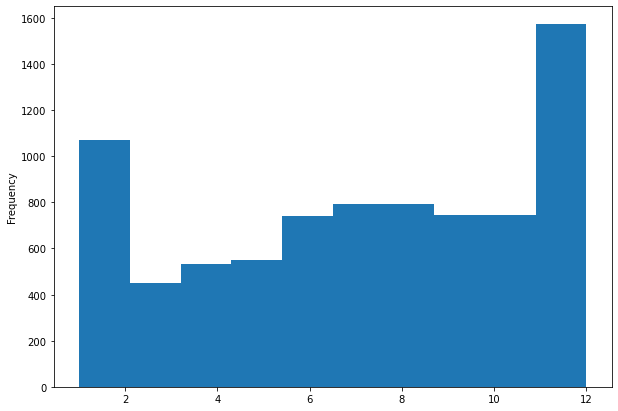

In [201]:
trends_df['order month'].plot.hist(figsize=(10,7))

In [206]:
def month_update(month):
    if month == 1: return 'January'
    if month == 2: return 'February'
    if month == 3: return 'March'
    if month == 4: return 'April'
    if month == 5: return 'May'
    if month == 6: return 'June'
    if month == 7: return 'July'
    if month == 8: return 'August'
    if month == 9: return 'September'
    if month == 10: return 'October'
    if month == 11: return 'November'
    if month == 12: return 'December'


In [207]:
trends_df['order month'] = trends_df['order month'].apply(lambda x: month_update(x))

In [230]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

trends_df['order month'] = pd.Categorical(trends_df['order month'], categories=months, ordered=True)

<AxesSubplot:title={'center':'Order frequency by month for 2018, 2019 and 2020'}>

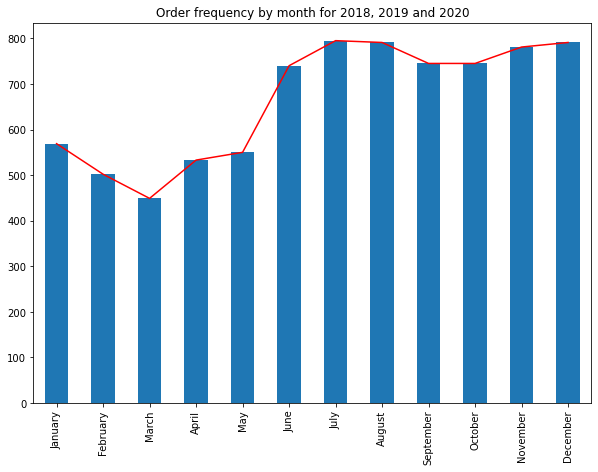

In [239]:
plt.title("Order frequency by month for 2018, 2019 and 2020")
trends_df['order month'].value_counts().sort_index().plot(color='red',figsize=(10,7))
trends_df['order month'].value_counts().sort_index().plot.bar(figsize=(10,7))

### We can assume that orders are highest in December and lowest in March based on the histogram and bar chart above. July and August appear to have particularly high orders too.